Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [3]:
df.head(3)


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [4]:
df[['animal', 'age']]


,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [5]:
df.loc[['d', 'e', 'i'], ['animal', 'age']]



,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [6]:
df[df['visits'] > 3]


,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [8]:
df[df['age'].isna()]


,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [9]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]


,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [10]:
df[df['age'].between(2, 4)]


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [11]:
df.loc['f', 'age'] = 1.5


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [12]:
df['visits'].sum()


19

**12.** Calculate the mean age for each different animal in `df`.

In [13]:
df.groupby('animal')['age'].mean()


animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [15]:
df.loc['k'] = ['hamster', 1.5, 2, 'no']
df = df.drop('k', axis=0)



**14.** Count the number of each type of animal in `df`.

In [16]:
df['animal'].value_counts()


cat      4
dog      4
snake    2
Name: animal, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [17]:
df = df.sort_values(by=['age', 'visits'], ascending=[False, True])


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [20]:
df['priority'] = df['priority'].replace({'yes': True, 'no': False})


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [25]:
df['animal'] = df['animal'].replace('snake', 'python')



**18.** Load the ny-flights dataset to Python

In [28]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/ny-flights.csv')
print(dataset)

                   fl_date unique_carrier  airline_id tail_num  fl_num origin  \
0      2014-01-01 00:00:00             AA       19805   N338AA       1    JFK   
1      2014-01-01 00:00:00             AA       19805   N335AA       3    JFK   
2      2014-01-01 00:00:00             AA       19805   N327AA      21    JFK   
3      2014-01-01 00:00:00             AA       19805   N3EHAA      29    LGA   
4      2014-01-01 00:00:00             AA       19805   N319AA     117    JFK   
...                    ...            ...         ...      ...     ...    ...   
20812  2014-01-31 00:00:00             UA       19977   N54711    1253    ROC   
20813  2014-01-31 00:00:00             UA       19977   N77525    1429    LGA   
20814  2014-01-31 00:00:00             UA       19977   N37293    1456    LGA   
20815  2014-01-31 00:00:00             UA       19977   N24729    1457    LGA   
20816  2014-01-31 00:00:00             MQ       20398   N609MQ    3699    BUF   

      dest  dep_time  dep_d

**19.** Which airline ID is present maximum times in the dataset

In [33]:

airline_counts = dataset['unique_carrier'].value_counts()
max_airline = airline_counts.idxmax()
print(f"The airline with ID {max_airline} is present {airline_counts[max_airline]} times in the dataset.")


The airline with ID B6 is present 4902 times in the dataset.


**20.** Draw a plot between dep_delay and arr_delay

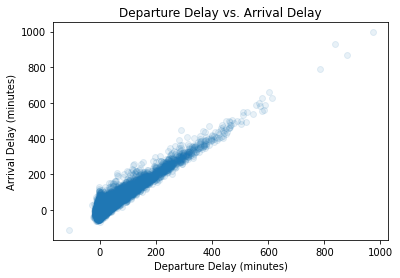

In [35]:
#Scatter plot
import matplotlib.pyplot as plt
df_delays = dataset[['dep_delay', 'arr_delay']]
df_delays = df_delays.dropna()
plt.scatter(df_delays['dep_delay'], df_delays['arr_delay'], alpha=0.1)
plt.title('Departure Delay vs. Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()
